In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,StratifiedKFold
from itertools import cycle

In [3]:
dataset = pd.read_csv('german.data',header = None,delim_whitespace = True)

C:\Users\subhr\AppData\Local\Temp\ipykernel_26936\3134085167.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv('german.data',header = None,delim_whitespace = True)


In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
dataset.columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "EmploymentSince", "InstallmentRate", "PersonalStatusSex",
    "Debtors", "ResidenceDuration", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "ExistingCredits", "Job", "PeopleLiable", "Telephone",
    "ForeignWorker", "Class"
]

In [7]:
dataset.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,Debtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,PeopleLiable,Telephone,ForeignWorker,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
dataset.describe()

,Duration,CreditAmount,InstallmentRate,ResidenceDuration,Age,ExistingCredits,PeopleLiable,Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Status                 1000 non-null   object
 1   Duration               1000 non-null   int64 
 2   CreditHistory          1000 non-null   object
 3   Purpose                1000 non-null   object
 4   CreditAmount           1000 non-null   int64 
 5   Savings                1000 non-null   object
 6   EmploymentSince        1000 non-null   object
 7   InstallmentRate        1000 non-null   int64 
 8   PersonalStatusSex      1000 non-null   object
 9   Debtors                1000 non-null   object
 10  ResidenceDuration      1000 non-null   int64 
 11  Property               1000 non-null   object
 12  Age                    1000 non-null   int64 
 13  OtherInstallmentPlans  1000 non-null   object
 14  Housing                1000 non-null   object
 15  ExistingCredits       

C:\Users\subhr\AppData\Local\Temp\ipykernel_26936\2468798034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot( dataset.CreditAmount, kde = False )


Text(0, 0.5, 'Frequency')

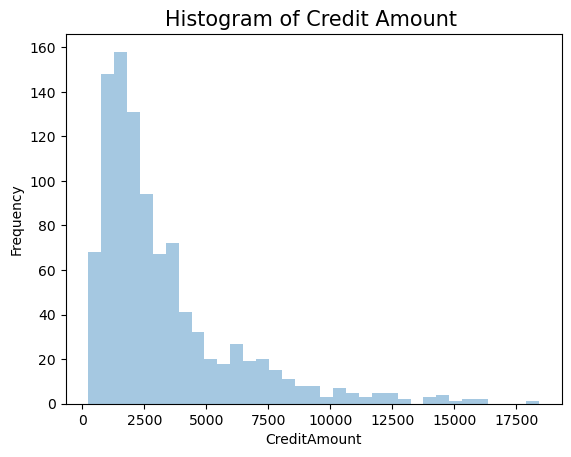

In [11]:
sn.distplot( dataset.CreditAmount, kde = False )
plt.title( "Histogram of Credit Amount ", fontsize = 15)
plt.ylabel( "Frequency")

C:\Users\subhr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\subhr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\subhr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\subhr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

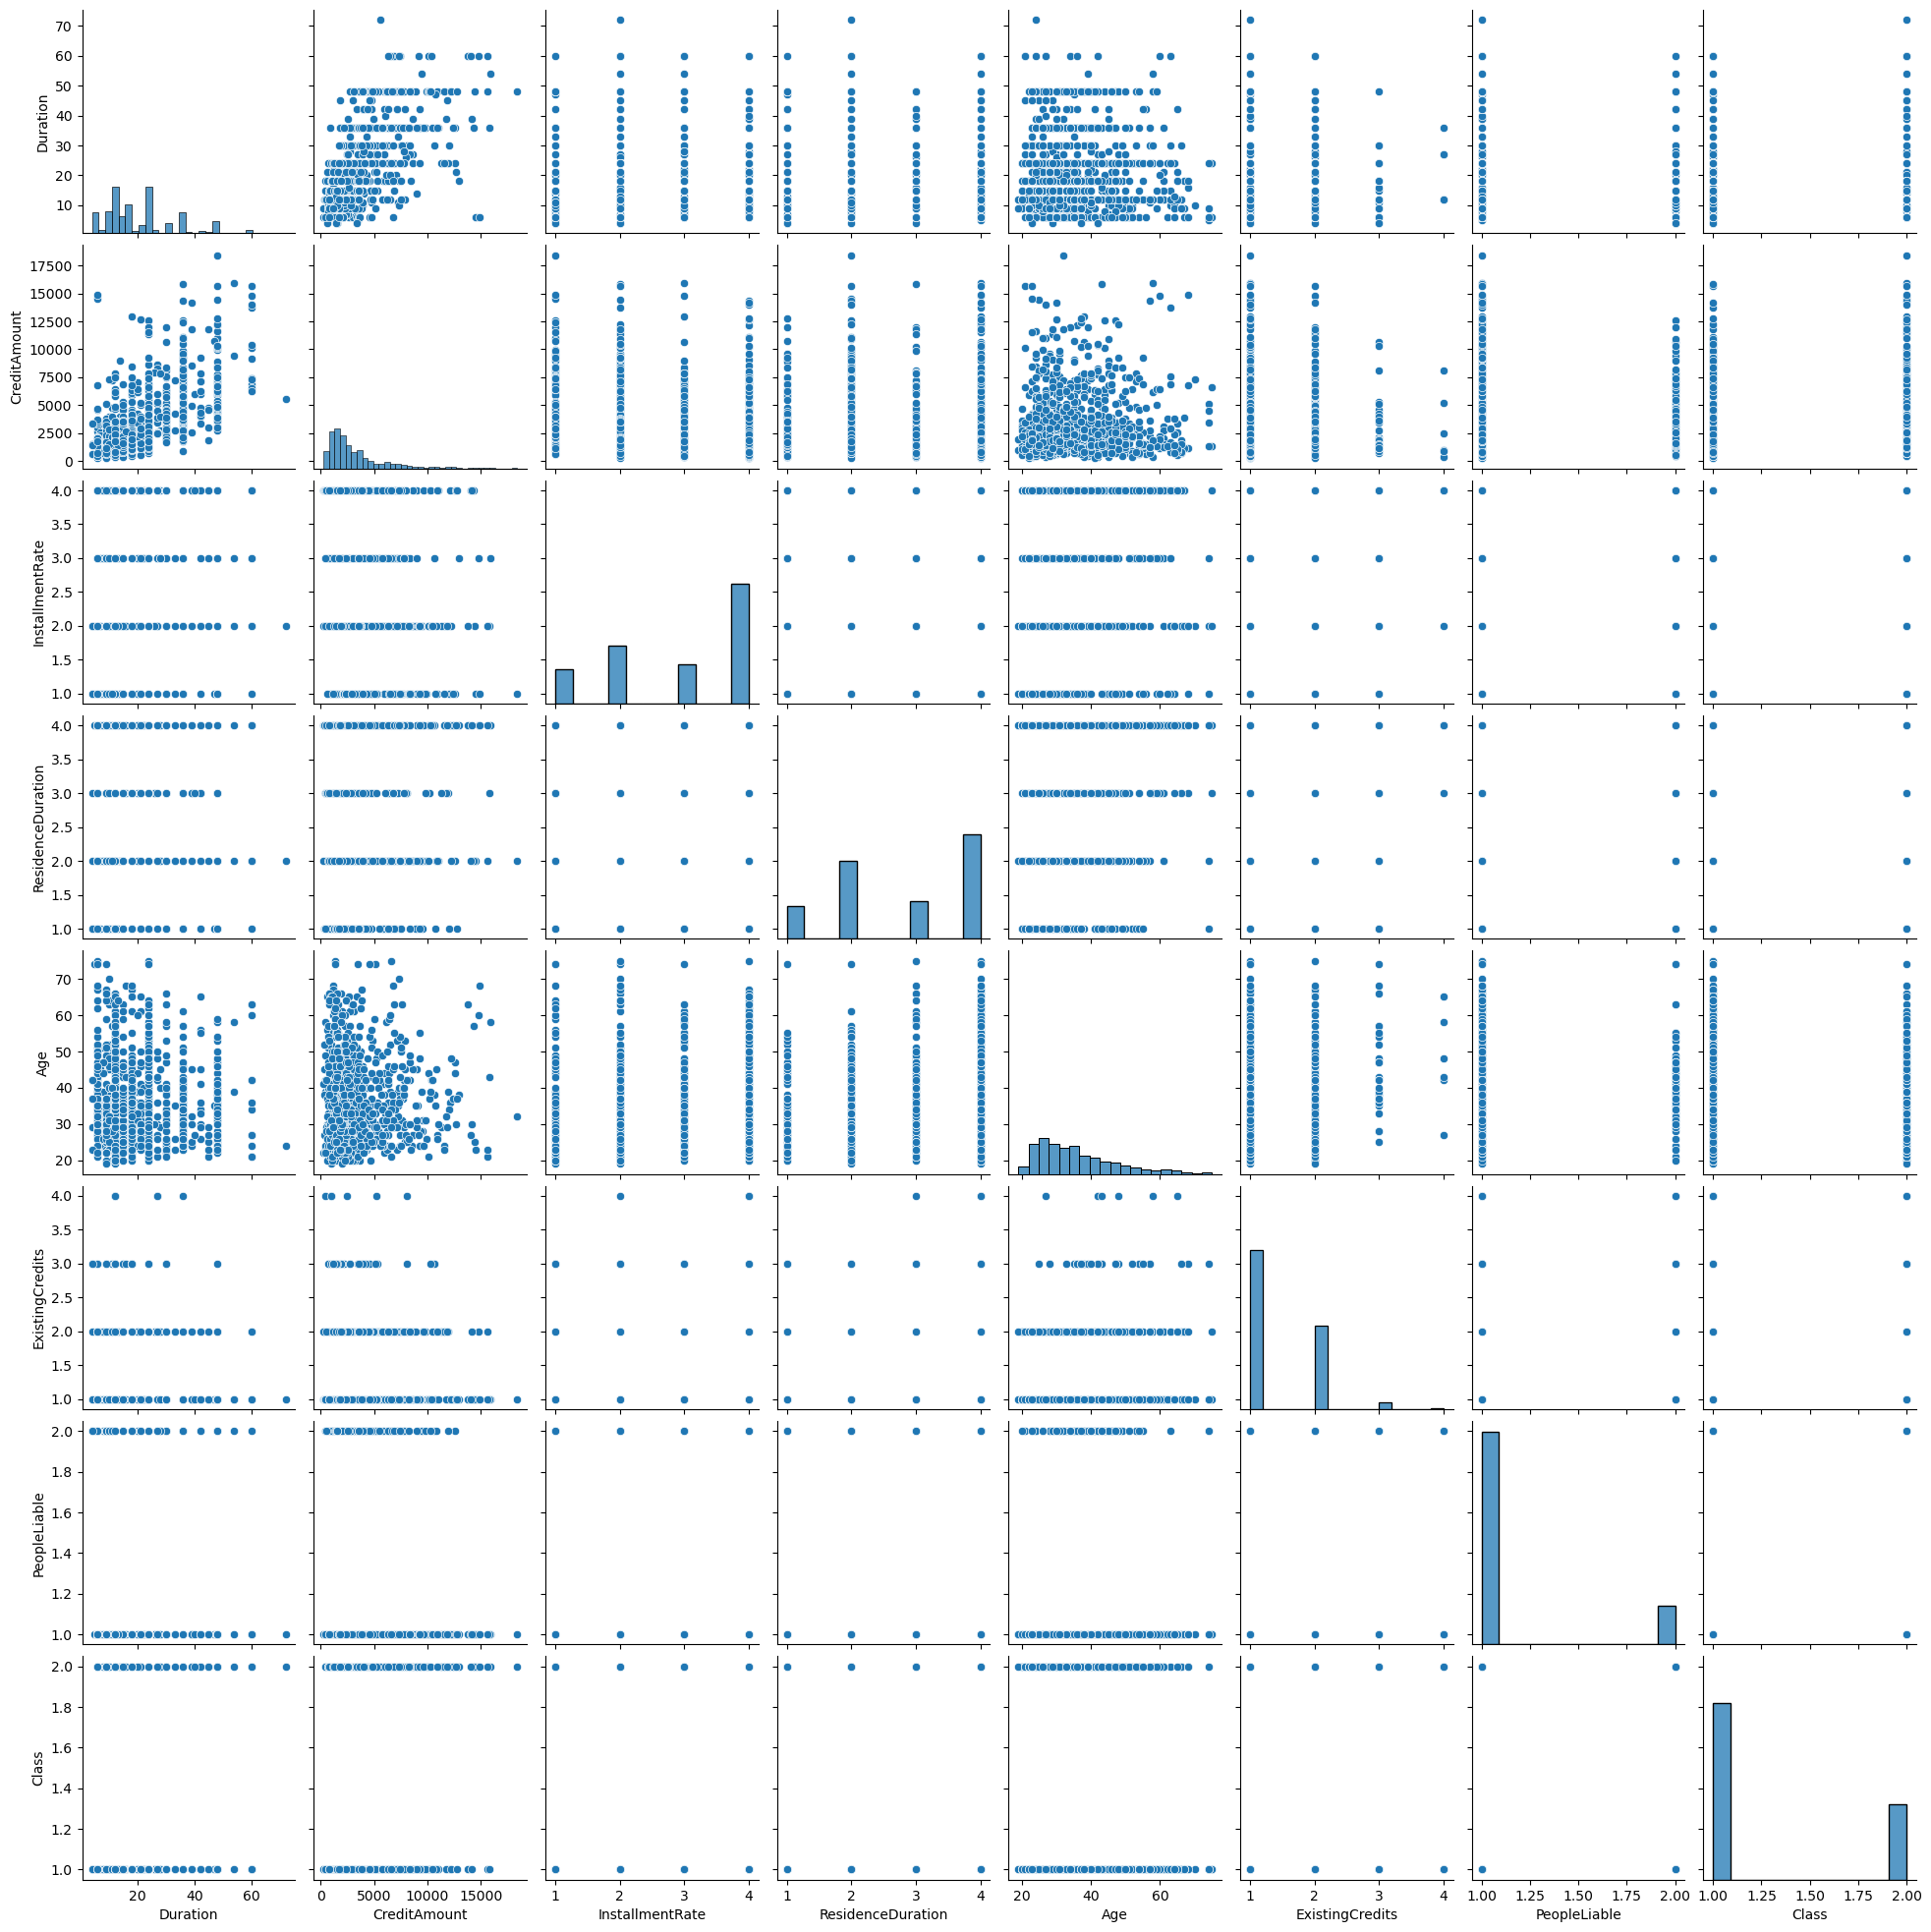

In [12]:
sn.pairplot(dataset)

In [34]:
X = list(dataset.columns)
X.remove("Status")

In [35]:
Y = dataset["Class"]

In [36]:
Y

0      1
1      2
2      1
3      1
4      2
      ..
995    1
996    1
997    1
998    2
999    1
Name: Class, Length: 1000, dtype: int64

In [37]:
X= pd.get_dummies(dataset[X],drop_first =True)
X

,Duration,CreditAmount,InstallmentRate,ResidenceDuration,Age,ExistingCredits,PeopleLiable,Class,CreditHistory_A31,CreditHistory_A32,...,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,ForeignWorker_A202
0,6,1169,4,4,67,2,1,1,False,False,...,False,False,True,True,False,False,True,False,True,False
1,48,5951,2,2,22,1,1,2,False,True,...,False,False,True,True,False,False,True,False,False,False
2,12,2096,2,3,49,1,2,1,False,False,...,False,False,True,True,False,True,False,False,False,False
3,42,7882,2,4,45,1,2,1,False,True,...,False,False,True,False,True,False,True,False,False,False
4,24,4870,3,4,53,2,2,2,False,False,...,True,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,False,True,...,False,False,True,True,False,True,False,False,False,False
996,30,3857,4,4,40,1,1,1,False,True,...,False,False,True,True,False,False,False,True,True,False
997,12,804,4,4,38,1,1,1,False,True,...,False,False,True,True,False,False,True,False,False,False
998,45,1845,4,4,23,1,1,2,False,True,...,True,False,True,False,True,False,True,False,True,False


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [41]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

In [42]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=500,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [53]:
from sklearn.metrics import accuracy_score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
Best ROC AUC: 1.0


In [54]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [55]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 1.0


In [56]:
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve,
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    RocCurveDisplay, PrecisionRecallDisplay
)

In [68]:
y_proba = best_rf.predict_proba(X_test)[:, 1]

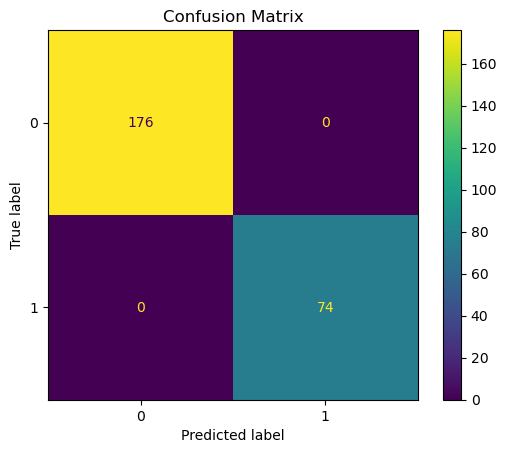

In [61]:
cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [67]:
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# --- 5. Individual Scores ---
print("🔢 Accuracy:", accuracy_score(y_test, y_pred))
print("🎯 Precision:",(y_test, y_pred))
print("📊 Recall:", (y_test, y_pred))
print("📈 F1 Score:",(y_test, y_pred))

📋 Classification Report:

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       176
           2     1.0000    1.0000    1.0000        74

    accuracy                         1.0000       250
   macro avg     1.0000    1.0000    1.0000       250
weighted avg     1.0000    1.0000    1.0000       250

🔢 Accuracy: 1.0
🎯 Precision: (993    1
859    1
298    1
553    1
672    1
      ..
462    1
356    1
2      1
478    1
695    1
Name: Class, Length: 250, dtype: int64, array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 